In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
params = {
    'task_type' : 'GPU',
    'n_estimators' : 125,
    'max_depth' : 13,
    'learning_rate' : 0.062516,
    'random_strength' : 8,
    'grow_policy': 'SymmetricTree'
}

## Baseline

In [3]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

lable_col = 'TARGET'
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

In [4]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[features_cols].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9046257893765149


## Замена значений F-ок на их логарифмы:

In [6]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

lable_col = 'TARGET'
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

In [12]:
features_cols.__len__()

111

In [5]:
float_cols = train.columns[train.dtypes == 'float64']
int_cols = train.columns[train.dtypes == 'int64']

F_cols = [col for col in float_cols if col[:2] == "F1" or col[:2] == "F2"]
non_F_cols = [col for col in float_cols if col[:2] != "F1" and col[:2] != "F2"]

def transform(df):
    
    for col in F_cols:
        
        df[col] = df[col].transform(np.log10)

In [7]:
transform(train)
transform(test)

In [9]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[features_cols].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.90327756821628


Вредит

##  Добавление Workersrange:

In [13]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

In [15]:
uniqs = train['WORKERSRANGE'].unique()
replacements = dict()

for i, j in zip([un for un in uniqs if type(un) == str], [int(un.split()[0]) for un in uniqs if type(un) == str]):
    
    replacements[i] = j
    
def transform(df):
    
    df['WORKERSRANGE'].replace(replacements, inplace = True)
    df['WORKERSRANGE'].fillna(-1, inplace = True)

In [16]:
transform(train)
transform(test)

In [17]:
lable_col = 'TARGET'
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

In [18]:
features_cols.__len__()

112

In [19]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[features_cols].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9126256103545038


In [21]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

In [20]:
from sklearn.preprocessing import LabelEncoder

In [22]:
def transform(df):
    
    le = LabelEncoder()
    df['WORKERSRANGE'].fillna("unknown", inplace = True)  
    df['WORKERSRANGE'] = le.fit_transform(df['WORKERSRANGE'])

In [23]:
transform(train)
transform(test)

In [24]:
lable_col = 'TARGET'
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

In [25]:
features_cols.__len__()

112

In [26]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[features_cols].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9108871123529136


In [27]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

In [28]:
def transform(df):
    
    df['WORKERSRANGE'].fillna("-1", inplace = True)  
    df['WORKERSRANGE'] = df['WORKERSRANGE'].transform(lambda x : int(x.split(" ")[0]))

In [29]:
transform(train)
transform(test)

In [31]:
lable_col = 'TARGET'
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist() 

In [32]:
features_cols.__len__()

112

In [33]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[features_cols].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9126257391981174


## Добавление зависимости от номера месяца:

In [34]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

In [38]:
def transform(df):
    
    df['WORKERSRANGE'].fillna("-1", inplace = True)  
    df['WORKERSRANGE'] = df['WORKERSRANGE'].transform(lambda x : int(x.split(" ")[0]))
    
    month_names = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    
    df['month_num'] = df['SIGN_DATE'].transform(lambda x : month_names.index(x[2:5]) + 1)

In [39]:
transform(train)
transform(test)

In [40]:
lable_col = 'TARGET'
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

In [41]:
features_cols.__len__()

113

In [42]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[features_cols].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.8790616236167246


ОКЕЙ. А что насчет сезонов?

In [48]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

In [49]:
def transform(df):
    
    df['WORKERSRANGE'].fillna("-1", inplace = True)  
    df['WORKERSRANGE'] = df['WORKERSRANGE'].transform(lambda x : int(x.split(" ")[0]))
    
    month_names = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
    
    df['month_num'] = df['SIGN_DATE'].transform(lambda x : ((month_names.index(x[2:5]) + 2) % 12) < 5).astype(int)

In [50]:
transform(train)
transform(test)

In [51]:
lable_col = 'TARGET'
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

In [52]:
features_cols.__len__()

113

In [53]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[features_cols].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.8996819988029442


## Добавление OHE

In [54]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

#### Citizenship_name

In [55]:
def transform(df):
    
    df['WORKERSRANGE'].fillna("-1", inplace = True)  
    df['WORKERSRANGE'] = df['WORKERSRANGE'].transform(lambda x : int(x.split(" ")[0]))
    
    col_name = 'Российская Федерация'    
    df[col_name] = (df['CITIZENSHIP_NAME'] == col_name).astype(int)

In [56]:
transform(train)
transform(test)

In [57]:
lable_col = 'TARGET'
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

In [58]:
features_cols.__len__()

113

In [59]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[features_cols].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9160271573894392


ohe_cols = [
        'OKFS_GROUP',
        'OKOPF_GROUP',
        'OKOGU_GROUP'
    ]
    
    for col in ohe_cols:
        
        df = df.join(pd.get_dummies(df[col]))
        df[col] = df[col].isna().astype(int)

In [69]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

In [70]:
def transform(df):
    
    df['WORKERSRANGE'].fillna("-1", inplace = True)  
    df['WORKERSRANGE'] = df['WORKERSRANGE'].transform(lambda x : int(x.split(" ")[0]))
    
    col_name = 'Российская Федерация'    
    df[col_name] = (df['CITIZENSHIP_NAME'] == col_name).astype(int)
    
    ohe_cols = [
        'OKFS_GROUP'
    ]
    
    for col in ohe_cols:
        
        df = df.join(pd.get_dummies(df[col]))
        df[col] = df[col].isna().astype(int)
    
    return df

In [71]:
train = transform(train)
test = transform(test)

In [72]:
lable_col = 'TARGET'
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

In [73]:
features_cols.__len__()

119

In [74]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[features_cols].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9114953990228823


In [75]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

In [76]:
def transform(df):
    
    df['WORKERSRANGE'].fillna("-1", inplace = True)  
    df['WORKERSRANGE'] = df['WORKERSRANGE'].transform(lambda x : int(x.split(" ")[0]))
    
    col_name = 'Российская Федерация'    
    df[col_name] = (df['CITIZENSHIP_NAME'] == col_name).astype(int)
    
    ohe_cols = [
        'OKOPF_GROUP'
    ]
    
    for col in ohe_cols:
        
        df = df.join(pd.get_dummies(df[col]))
        df[col] = df[col].isna().astype(int)
    
    return df

In [77]:
train = transform(train)
test = transform(test)

In [78]:
lable_col = 'TARGET'
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

In [79]:
features_cols.__len__()

119

In [80]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[features_cols].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9132537551181367


In [81]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

In [82]:
def transform(df):
    
    df['WORKERSRANGE'].fillna("-1", inplace = True)  
    df['WORKERSRANGE'] = df['WORKERSRANGE'].transform(lambda x : int(x.split(" ")[0]))
    
    col_name = 'Российская Федерация'    
    df[col_name] = (df['CITIZENSHIP_NAME'] == col_name).astype(int)
    
    ohe_cols = [
        'OKOGU_GROUP'
    ]
    
    for col in ohe_cols:
        
        df = df.join(pd.get_dummies(df[col]))
        df[col] = df[col].isna().astype(int)
    
    return df

In [83]:
train = transform(train)
test = transform(test)

In [84]:
lable_col = 'TARGET'
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

In [85]:
features_cols.__len__()

118

In [86]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[features_cols].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9146005981798092


## Текущая форма: roc_auc_score: 0.9160271573894392

In [99]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

In [100]:
def transform(df):
    
    df['WORKERSRANGE'].fillna("-1", inplace = True)  
    df['WORKERSRANGE'] = df['WORKERSRANGE'].transform(lambda x : int(x.split(" ")[0]))
    
    col_name = 'Российская Федерация'    
    df[col_name] = (df['CITIZENSHIP_NAME'] == col_name).astype(int)

In [101]:
transform(train)
transform(test)

In [102]:
lable_col = 'TARGET'
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

In [103]:
features_cols.__len__()

113

In [104]:
best_score = 0.9160271573894392
k = 0

for i in range(features_cols.__len__()):
    
    features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()
    dropped_col = features_cols.pop(k)
    print(i, dropped_col)
    
    model = CatBoostClassifier(**params, silent = True)

    cv_baseline_score = cross_val_score(model, train[features_cols].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
    print(f'roc_auc_score: {cv_baseline_score}')
    
    if cv_baseline_score > best_score:
        best_score = cv_baseline_score
        train.drop(columns = dropped_col, inplace = True)
    else:
        k += 1

0 id_contract


Custom logger is already specified. Specify more than one logger at same time is not thread safe.

roc_auc_score: 0.9195083437595107
1 id_client
roc_auc_score: 0.915933695328244
2 IP_flag
roc_auc_score: 0.9184054493497318
3 F1100
roc_auc_score: 0.9184285337927202
4 F1110
roc_auc_score: 0.9173704203724613
5 F1150
roc_auc_score: 0.9179149115810432
6 F1160
roc_auc_score: 0.9177058749324353
7 F1170
roc_auc_score: 0.9193863782158683
8 F1180
roc_auc_score: 0.9170512384777373
9 F1190
roc_auc_score: 0.9163532337413661
10 F1200
roc_auc_score: 0.9174449217148849
11 F1210
roc_auc_score: 0.9169821616981618
12 F1220
roc_auc_score: 0.91803349880872
13 F1230
roc_auc_score: 0.917363637252187
14 F1240
roc_auc_score: 0.9181712177743371
15 F1250
roc_auc_score: 0.9185631075022263
16 F1260
roc_auc_score: 0.9177331779953308
17 F1300
roc_auc_score: 0.9179339513396814
18 F1310
roc_auc_score: 0.9185120019102591
19 F1320
roc_auc_score: 0.919663610309874
20 F1350
roc_auc_score: 0.9194370885249974
21 F1360
roc_auc_score: 0.9194896047953754
22 F1370
roc_auc_score: 0.918214193095352
23 F1400
roc_auc_score: 0.920

In [105]:
train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

['id_client',
 'IP_flag',
 'F1100',
 'F1110',
 'F1150',
 'F1160',
 'F1170',
 'F1180',
 'F1190',
 'F1200',
 'F1210',
 'F1220',
 'F1230',
 'F1240',
 'F1250',
 'F1260',
 'F1300',
 'F1310',
 'F1350',
 'F1360',
 'F1370',
 'F1420',
 'F1450',
 'F1500',
 'F1510',
 'F1520',
 'F1530',
 'F1550',
 'F1600',
 'F1700',
 'F2100',
 'F2110',
 'F2120',
 'F2200',
 'F2210',
 'F2220',
 'F2300',
 'F2310',
 'F2320',
 'F2330',
 'F2340',
 'F2350',
 'F2400',
 'F2410',
 'F1150_LAG1',
 'F1230_LAG1',
 'F1410_LAG1',
 'F1510_LAG1',
 'F1520_LAG1',
 'F2110_LAG1',
 'F2120_LAG1',
 'F2200_LAG1',
 'F2210_LAG1',
 'F2220_LAG1',
 'F2300_LAG1',
 'F2320_LAG1',
 'F2330_LAG1',
 'F2400_LAG1',
 'EGRPOINCLUDED',
 'OKATO_REGIONCODE',
 'OKATO_FED',
 'OKTMO_CODE',
 'OKTMO_FED',
 'WORKERSRANGE',
 'COUNTCOOWNERFCSM',
 'COUNTCOOWNERROSSTAT',
 'COUNTCOOWNEREGRUL',
 'COUNTBRANCH',
 'COUNTBRANCHROSSTAT',
 'COUNTBRANCHEGRUL',
 'TELEPHONECOUNT',
 'MANAGERCOUNTINCOUNTRY',
 'MANAGERCOUNTINREGION',
 'MANAGERINNCOUNT',
 'PLAINTIFF_CASESNUMBER_YEAR

In [143]:
FEATURES_BACKUP = ['id_client',
 'IP_flag',
 'F1100',
 'F1110',
 'F1150',
 'F1160',
 'F1170',
 'F1180',
 'F1190',
 'F1200',
 'F1210',
 'F1220',
 'F1230',
 'F1240',
 'F1250',
 'F1260',
 'F1300',
 'F1310',
 'F1350',
 'F1360',
 'F1370',
 'F1420',
 'F1450',
 'F1500',
 'F1510',
 'F1520',
 'F1530',
 'F1550',
 'F1600',
 'F1700',
 'F2100',
 'F2110',
 'F2120',
 'F2200',
 'F2210',
 'F2220',
 'F2300',
 'F2310',
 'F2320',
 'F2330',
 'F2340',
 'F2350',
 'F2400',
 'F2410',
 'F1150_LAG1',
 'F1230_LAG1',
 'F1410_LAG1',
 'F1510_LAG1',
 'F1520_LAG1',
 'F2110_LAG1',
 'F2120_LAG1',
 'F2200_LAG1',
 'F2210_LAG1',
 'F2220_LAG1',
 'F2300_LAG1',
 'F2320_LAG1',
 'F2330_LAG1',
 'F2400_LAG1',
 'EGRPOINCLUDED',
 'OKATO_REGIONCODE',
 'OKATO_FED',
 'OKTMO_CODE',
 'OKTMO_FED',
 'WORKERSRANGE',
 'COUNTCOOWNERFCSM',
 'COUNTCOOWNERROSSTAT',
 'COUNTCOOWNEREGRUL',
 'COUNTBRANCH',
 'COUNTBRANCHROSSTAT',
 'COUNTBRANCHEGRUL',
 'TELEPHONECOUNT',
 'MANAGERCOUNTINCOUNTRY',
 'MANAGERCOUNTINREGION',
 'MANAGERINNCOUNT',
 'PLAINTIFF_CASESNUMBER_YEAR',
 'PLAINTIFF_SUM_YEAR',
 'DEFENDANT_CASESNUMBER_YEAR',
 'DEFENDANT_SUM_YEAR',
 'THIRDOROTHERPERSON_YEAR',
 'PLAINTIFF_CASESNUMBER_EVER',
 'PLAINTIFF_SUM_EVER',
 'DEFENDANT_CASESNUMBER_EVER',
 'DEFENDANT_SUM_EVER',
 'THIRDOROTHERPERSON_EVER',
 'ADMITTEDNUMBER_233_YEAR',
 'NOTADMITTEDNUMBER_233_YEAR',
 'WINNERNUMBER_233_YEAR',
 'SIGNEDNUMBER_233_YEAR',
 'SUM_233_YEAR',
 'ADMITTEDNUMBER_233_EVER',
 'NOTADMITTEDNUMBER_233_EVER',
 'WINNERNUMBER_233_EVER',
 'SIGNEDNUMBER_233_EVER',
 'SUM_233_EVER',
 'ADMITTEDNUMBER_95_YEAR',
 'NOTADMITTEDNUMBER_95_YEAR',
 'WINNERNUMBER_95_YEAR',
 'SIGNEDNUMBER_95_YEAR',
 'SUM_95_YEAR',
 'ADMITTEDNUMBER_95_EVER',
 'NOTADMITTEDNUMBER_EVER',
 'WINNERNUMBER_95_EVER',
 'SIGNEDNUMBER_95_EVER',
 'COUNT_CHANGE_YEAR',
 'COUNT_CHANGE_EVER',
 'AGE',
 'Российская Федерация']

## Новая форма. Baseline: 0.9219889509336351

In [108]:
from copy import deepcopy

In [106]:
features_cols = train.drop('TARGET', axis='columns').select_dtypes(include=[np.number]).columns.tolist()

In [107]:
features_cols.__len__()

107

In [109]:
def transform(df):
    
    df['WORKERSRANGE'].fillna("-1", inplace = True)  
    df['WORKERSRANGE'] = df['WORKERSRANGE'].transform(lambda x : int(x.split(" ")[0]))
    
    col_name = 'Российская Федерация'    
    df[col_name] = (df['CITIZENSHIP_NAME'] == col_name).astype(int)

In [170]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')
test = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

In [171]:
transform(train)
transform(test)

## Feature 1: Time from prev. application

In [114]:
import datetime

In [112]:
combination = train.drop(columns = 'TARGET').append(test, ignore_index = True)
combination['SIGN_DATE'] = combination['SIGN_DATE'].transform(lambda x : x[:9])

In [115]:
combination['sign_dt'] = combination['SIGN_DATE'].transform(lambda x : (datetime.datetime.strptime(x, '%d%b%Y') - datetime.datetime(2018, 1, 1)).days)

In [116]:
combination['time_diff'] = (combination['sign_dt'] - combination.groupby('id_client')['sign_dt'].shift(1))
combination['mean_time_diff'] = combination.groupby('id_client')['time_diff'].transform('mean')
combination['application_number'] = combination.groupby('id_client').cumcount() + 1

In [129]:
combination['application_number'].isna().sum()

0

### a) fillna = -1

In [118]:
train['time_diff'] = combination.loc[train.index, 'time_diff'].fillna(-1)
test['time_diff'] = combination.loc[test.index + train.shape[0] - 1, 'time_diff'].fillna(-1)

In [120]:
used_features = deepcopy(features_cols)
used_features.append('time_diff')

In [121]:
used_features.__len__()

108

In [122]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[used_features].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9367473766214556


### b) fillna = max

In [123]:
train['time_diff'] = combination.loc[train.index, 'time_diff'].fillna(combination['time_diff'].max())
test['time_diff'] = combination.loc[test.index + train.shape[0] - 1, 'time_diff'].fillna(combination['time_diff'].max())

In [124]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[used_features].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9404875213821364


## c) fillna = 0

In [125]:
train['time_diff'] = combination.loc[train.index, 'time_diff']
test['time_diff'] = combination.loc[test.index + train.shape[0] - 1, 'time_diff']

In [126]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[used_features].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9240388205640999


## Chosen one:

In [172]:
train['time_diff'] = combination.loc[train.index, 'time_diff'].fillna(combination['time_diff'].max())
test['time_diff'] = combination.loc[test.index + train.shape[0] - 1, 'time_diff'].fillna(combination['time_diff'].max())

In [128]:
features_cols.append('time_diff')

## Feature 2: Quantity of applications before this one

In [130]:
train['app_quant'] = combination.loc[train.index, 'application_number']
test['app_quant'] = combination.loc[test.index + train.shape[0] - 1, 'application_number']

In [132]:
used_features = deepcopy(features_cols)
used_features.append('app_quant')

In [133]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[used_features].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9403096490970453


In [134]:
train.drop(columns = 'app_quant', inplace = True)
test.drop(columns = 'app_quant', inplace = True)

## Feature 3: Average time between applications

### a) fillna = max

In [135]:
train['avg_diff'] = combination.loc[train.index, 'mean_time_diff'].fillna(combination['mean_time_diff'].max())
test['avg_diff'] = combination.loc[test.index + train.shape[0] - 1, 'mean_time_diff'].fillna(combination['mean_time_diff'].max())

In [136]:
used_features = deepcopy(features_cols)
used_features.append('avg_diff')

In [137]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[used_features].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9457477838466722


### b) fillna = -1

In [138]:
train['avg_diff'] = combination.loc[train.index, 'mean_time_diff'].fillna(-1)
test['avg_diff'] = combination.loc[test.index + train.shape[0] - 1, 'mean_time_diff'].fillna(-1)

In [139]:
used_features = deepcopy(features_cols)
used_features.append('avg_diff')

In [140]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[used_features].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9459163684824716


### c) fillna = 0

In [141]:
train['avg_diff'] = combination.loc[train.index, 'mean_time_diff']
test['avg_diff'] = combination.loc[test.index + train.shape[0] - 1, 'mean_time_diff']

In [142]:
model = CatBoostClassifier(**params, silent = True)

cv_baseline_score = cross_val_score(model, train[used_features].fillna(0), train[lable_col], cv=5, scoring='roc_auc').mean()
print(f'roc_auc_score: {cv_baseline_score}')

roc_auc_score: 0.9455661269167983


## Chosen one

In [173]:
train['avg_diff'] = combination.loc[train.index, 'mean_time_diff'].fillna(-1)
test['avg_diff'] = combination.loc[test.index + train.shape[0] - 1, 'mean_time_diff'].fillna(-1)

In [145]:
features_cols.append('avg_diff')

## Non-KFold_Training

In [174]:
model = CatBoostClassifier(**params)
model.fit(train[features_cols], train[lable_col])

0:	learn: 0.6320684	total: 155ms	remaining: 19.2s
1:	learn: 0.5773954	total: 301ms	remaining: 18.5s
2:	learn: 0.5307430	total: 442ms	remaining: 18s
3:	learn: 0.4995908	total: 542ms	remaining: 16.4s
4:	learn: 0.4715261	total: 662ms	remaining: 15.9s
5:	learn: 0.4599157	total: 672ms	remaining: 13.3s
6:	learn: 0.4350859	total: 796ms	remaining: 13.4s
7:	learn: 0.4126812	total: 914ms	remaining: 13.4s
8:	learn: 0.3967199	total: 1.04s	remaining: 13.4s
9:	learn: 0.3838099	total: 1.16s	remaining: 13.4s
10:	learn: 0.3739512	total: 1.18s	remaining: 12.2s
11:	learn: 0.3656856	total: 1.2s	remaining: 11.3s
12:	learn: 0.3521494	total: 1.32s	remaining: 11.4s
13:	learn: 0.3446150	total: 1.34s	remaining: 10.6s
14:	learn: 0.3400598	total: 1.35s	remaining: 9.94s
15:	learn: 0.3347546	total: 1.41s	remaining: 9.61s
16:	learn: 0.3248630	total: 1.54s	remaining: 9.77s
17:	learn: 0.3188317	total: 1.63s	remaining: 9.7s
18:	learn: 0.3135351	total: 1.76s	remaining: 9.82s
19:	learn: 0.3070245	total: 1.88s	remaining: 

In [175]:
subm = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

subm['TARGET'] = model.predict_proba(test[features_cols])[:, 1]

subm[['id_contract', 'TARGET']].to_csv("submission_example.csv", sep = ';', index = False)

In [178]:
def plot_calibration_curve(y_test, preds):
    """
    preds --- array of probabilities
    """
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((l + r) / 2)
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)]))
    plt.plot(bin_middle_points, bin_real_ratios)
    plt.show()

## Training

In [177]:
from sklearn.model_selection import KFold
from sklearn import metrics

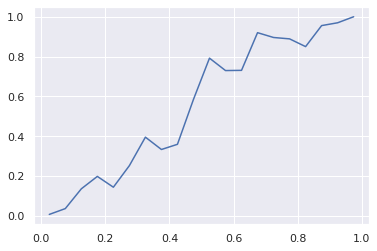

Iter number 1 0.955210893213776


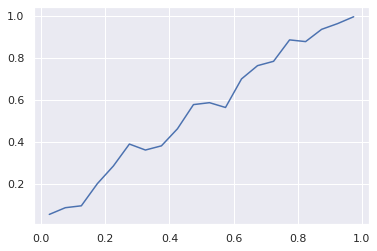

Iter number 2 0.9357827865775842


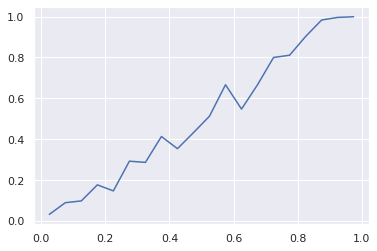

Iter number 3 0.9457188949926836


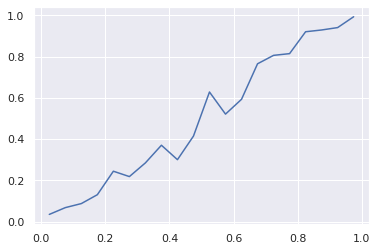

Iter number 4 0.9332119446467589


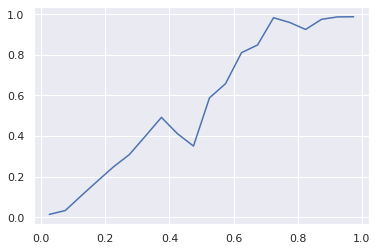

Iter number 5 0.9571673316083518


In [179]:
models = []
k = 1

for train_ids, test_ids in KFold(n_splits=5).split(train[features_cols], train[lable_col]):
    
    X_train, X_test = train.loc[train_ids, features_cols], train.loc[test_ids, features_cols]
    Y_train, Y_test = train.loc[train_ids, lable_col], train.loc[test_ids, lable_col]
    
    model = CatBoostClassifier(**params, silent = True)
    model.fit(X_train, Y_train, eval_set = (X_test, Y_test))
    
    plot_calibration_curve(Y_test, model.predict_proba(X_test)[:, 1])
    
    print(f"Iter number {k}", metrics.roc_auc_score(Y_test, model.predict_proba(X_test)[:, 1]))
    models.append(model)
    k += 1

In [151]:
subm = pd.read_csv("Datasets/test_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

subm['TARGET'] = 0.0

for model in models:
    
    subm['TARGET'] += model.predict_proba(test[features_cols])[:, 1]
    
subm['TARGET'] /= 5

In [152]:
subm[['id_contract', 'TARGET']].to_csv("submission_example.csv", sep = ';', index = False)

## Manually changing answers

In [153]:
exemp = pd.DataFrame.copy(subm)

In [154]:
exemp[['id_client', 'TARGET']]

,id_client,TARGET
0,3620,0.226580
1,4101,0.418582
2,9589,0.357320
3,11546,0.809954
4,12558,0.929643
...,...,...
7325,8128,0.811091
7326,1132,0.043598
7327,4932,0.824088
7328,537,0.893254


In [155]:
intersect = set(exemp['id_client']) & set(train['id_client'])

In [156]:
train = pd.read_csv("Datasets/train_dataset_hackathon_mkb.csv", sep = ';', encoding = 'cp1251')

In [157]:
active_ids = (train.groupby('id_client')['id_contract'].count() > 5).keys()[(train.groupby('id_client')['id_contract'].count() > 5).values]

In [158]:
len(set(active_ids) & intersect)

145

In [159]:
their_values = train.groupby('id_client')['TARGET'].mean()[(train.groupby('id_client')['id_contract'].count() > 5)].values

In [160]:
their_values[(their_values > 0.8)] = 1
their_values[(their_values < 0.2)] = 0

In [161]:
kept_ones = (their_values == 1) | (their_values == 0)

In [162]:
active_ids = active_ids[kept_ones]
their_values = their_values[kept_ones]

In [163]:
active_ids.shape, their_values.shape

((303,), (303,))

In [164]:
sub_df = pd.DataFrame(np.array([active_ids, their_values]).T, columns = ['id_client', 'TARGET_new'])

In [165]:
exemp = exemp.merge(sub_df, how = 'left')

In [166]:
exemp.loc[~exemp['TARGET_new'].isna(), 'TARGET'] = exemp.loc[~exemp['TARGET_new'].isna(), 'TARGET_new']

In [168]:
exemp[['id_contract', 'TARGET']].to_csv("submission_tied.csv", sep = ';', index = False)